In [2]:
import pandas as pd
import quandl

quandl.ApiConfig.api_key = "Psh_skLqP9DMZGBUyqGx"

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2019-09-13')

aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [3]:
for s in (aapl, cisco, ibm, amzn):
    s['Normed Return'] = s['Adj. Close'] / s.iloc[0]['Adj. Close']

In [4]:
# Portfolio Allocations
for s, allocation in zip((aapl, cisco, ibm, amzn), [.3, .2, .4, .1]):
    s['Allocation'] = s['Normed Return'] * allocation

In [6]:
portfolio_size = 10000
for s in (aapl, cisco, ibm, amzn):
    s['Position Values'] = s['Allocation'] * portfolio_size

In [9]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [10]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2015-01-02,3000.000000,2000.000000,4000.000000,1000.000000
2015-01-05,2915.485228,1960.159363,3937.060348,979.482692
2015-01-06,2915.759627,1959.434987,3852.153523,957.117853
2015-01-07,2956.645020,1977.544368,3826.977663,967.263062
2015-01-08,3070.246044,1992.756248,3910.156732,973.875276


In [11]:
portfolio_val.columns = ['AAPL', 'CISCO', 'IBM', 'AMZN']

In [12]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

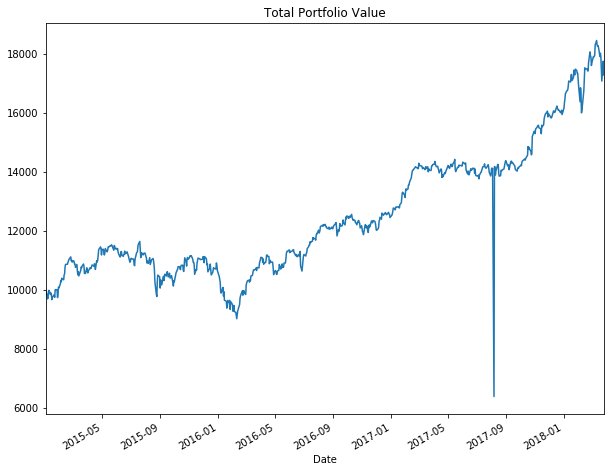

In [14]:
portfolio_val['Total Pos'].plot(figsize=(10, 8))
plt.title('Total Portfolio Value')

In [15]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [16]:
portfolio_val['Daily Return'].mean()

0.0015560230321905414

In [17]:
portfolio_val['Daily Return'].std()

0.048245127199806614

In [21]:
cumulative_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)
print(cumulative_ret)

72.83006610722491


In [22]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
print(SR)

0.03225243921000127


In [24]:
ASR = (252** 0.5) * SR
print(ASR)

0.5119915999493512
